
### 1. Data Cleaning
- **Identify and handle missing values:**  
### 2. Data Preprocessing
- **Encoding categorical variables:** 
- **Feature scaling:** 

### 3. Feature Selection
- **Correlation analysis:** 
- **Feature importance:** 

### 4. Model Selection
- **Train multiple models:**  
- **Compare performance:** 

### 5. Hyperparameter Tuning
- **Grid Search or Random Search:** 
- **Cross-validation:** 

### 6. Evaluation
- **Final evaluation:** 
- **Confusion matrix:** 

### 7. Deployment
- **Streamlit:** 
- **User interface:** 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000


check for missing values

Missing Values:
job           39
marital       11
education    167
default      803
housing      105
loan         105
dtype: int64

Percentage of Missing Values:
job           0.946832
marital       0.267055
education     4.054382
default      19.495023
housing       2.549162
loan          2.549162
dtype: float64


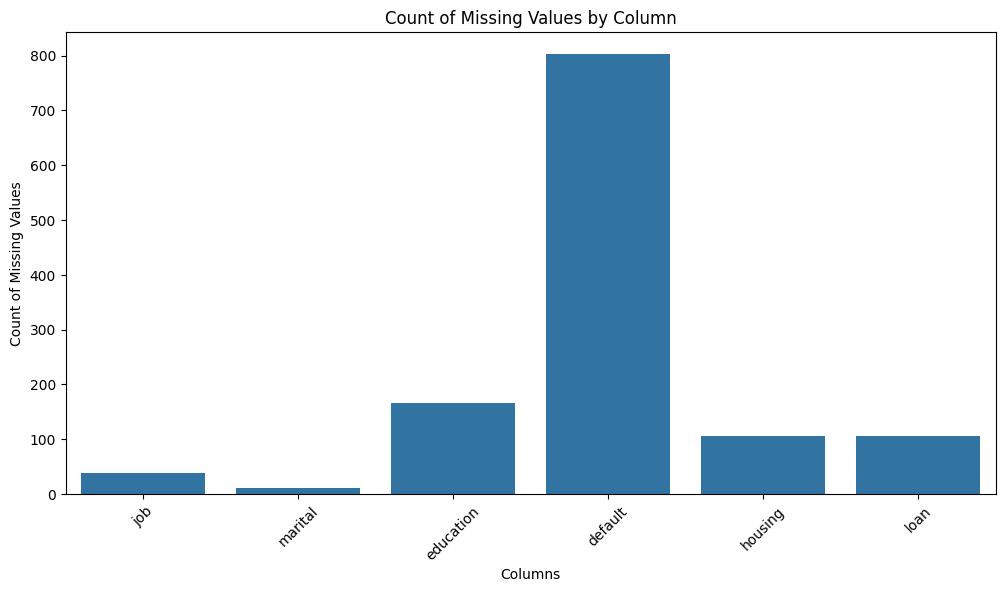

In [5]:
data = pd.read_csv("dataset/bank-additional.csv", sep=';')

# Check for missing values (encoded as "unknown")
missing_values = data.isin(['unknown']).sum()

# Display columns with missing values and their counts
missing_values = missing_values[missing_values > 0]
print("Missing Values:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Visualization of missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Count of Missing Values by Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Drop the duration column as it is not known before a call is performed
data = data.drop('duration', axis=1)


In [9]:

#TODO again, this is just a simple print out of the data, we can make it look better and maybe add some visualizations


# Convert 'yes'/'no' target to binary
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Analyze missing values' impact
for col in missing_values.index:
    missing_mask = data[col] == 'unknown'
    total_missing = missing_mask.sum()
    total_non_missing = len(data) - total_missing
    
    print(f"{col} (missing: {total_missing})")
    proportion = data.groupby(missing_mask)['y'].mean()
    print("Proportion of 'yes' for missing vs non-missing:")
    print(f"Missing: {proportion[True]:.2%}")
    print(f"Non-missing: {proportion[False]:.2%}")
    
    # Calculate percentage difference
    diff_percentage = (proportion[True] - proportion[False]) * 100
    print(f"Difference in proportion: {diff_percentage:.2f}%")
    print()
    




job (missing: 39)
Proportion of 'yes' for missing vs non-missing:
Missing: 10.26%
Non-missing: 10.96%
Difference in proportion: -0.70%

marital (missing: 11)
Proportion of 'yes' for missing vs non-missing:
Missing: 9.09%
Non-missing: 10.95%
Difference in proportion: -1.86%

education (missing: 167)
Proportion of 'yes' for missing vs non-missing:
Missing: 15.57%
Non-missing: 10.75%
Difference in proportion: 4.81%

default (missing: 803)
Proportion of 'yes' for missing vs non-missing:
Missing: 6.10%
Non-missing: 12.12%
Difference in proportion: -6.02%

housing (missing: 105)
Proportion of 'yes' for missing vs non-missing:
Missing: 8.57%
Non-missing: 11.01%
Difference in proportion: -2.44%

loan (missing: 105)
Proportion of 'yes' for missing vs non-missing:
Missing: 8.57%
Non-missing: 11.01%
Difference in proportion: -2.44%




| **Column**   | **Missing Count** | **Difference in Proportion of 'Yes'** | **Suggestion**                                                                                                                                          |
|---------------|-------------------|---------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **job**       | 39               | -0.70%                                | The small difference suggests minimal bias. Imputed missing values with the mode (`most frequent value`).                                                  |
| **marital**   | 11               | -1.86%                                | The difference is small but notable. Imputed missing values with the mode, as the missing rate and impact are low.                                         |
| **education** | 167              | +4.81%                                | Missing values appear to show higher success rates. "unknown" will be encoded as a separate category to capture this distinction.                      |
| **default**   | 803              | -6.02%                                | The larger difference and high missing rate suggest that encoding "unknown" as a separate category might better capture its relationship to the target.   |
| **housing**   | 105              | -2.44%                                | The moderate difference suggests some potential bias. However after further testing with the full dataset (where the proportion is -%0.47), this bias appears to be a result of the random %10 selected more so than the actual impact of the class. Imputed missing values with the mode. |
| **loan**      | 105              | -2.44%                                | Similar situation to **housing** with a proportion of -%0.47, imputed with the mode. *The similarity with housing has been noted for future reference*|


In [23]:
#Could be adjusted to display some info or just a number of adjusted values

# Imputation with mode for 'job', 'marital', 'housing', and 'loan'
for col in ['job', 'marital', 'housing', 'loan']:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('unknown', mode_value)

# No imputation for 'education' and 'default'
# 'unknown' will remain as a separate category for encoding
# These columns are left unchanged





### Final Encoding Decisions and Reasons

| **Variable**     | **Encoding Decision**     | **Reason**                                                                 |
|------------------|---------------------------|---------------------------------------------------------------------------|
| **job**          | One-hot encoding           | "job" is a nominal categorical variable with distinct types; one-hot encoding prevents introducing any ordinal relationships. |
| **marital**      | One-hot encoding           | "marital" is a categorical variable with distinct values and no natural order. One-hot encoding handles it appropriately. |
| **education**    | One-hot encoding           | "education" includes "unknown" as its own category; one-hot encoding treats each category (including `unknown`) as a separate binary column. |
| **default**      | One-hot encoding           | "default" is a binary categorical variable with "no" and "yes" values and additionally includes "unknown" as its own category, so one-hot encoding is appropriate. |
| **housing**      | One-hot encoding           | "housing" is a binary categorical variable with "no" and "yes" values, and one-hot encoding works well here. |
| **loan**         | One-hot encoding           | "loan" is also binary, with "no" and "yes" values, and one-hot encoding is suitable. |
| **contact**      | One-hot encoding           | "contact" is a nominal categorical variable with distinct types ("cellular", "telephone"), making one-hot encoding ideal. |
| **month**        | Cyclical encoding (sin/cos) | "month" is cyclical (e.g., December follows January), so sine and cosine transformations capture its cyclical nature. |
| **day_of_week**  | One-hot encoding           | "day_of_week" is a nominal categorical variable with distinct values (days of the week) and no inherent order, so one-hot encoding is suitable. |
| **poutcome**     | One-hot encoding           | "poutcome" is categorical with distinct values (e.g., "failure", "success"), and one-hot encoding captures the separate categories. |



In [24]:


onehot_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome', 'education']
numerical_cols = ['age', 'duration', 'campaign', 'month_sin', 'month_cos', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                  'cons.conf.idx', 'euribor3m', 'nr.employed']  # List of numerical columns

# Function to apply cyclical encoding to 'month'
def encode_months(df):
    # Map months to numbers
    month_mapping = {
        "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
        "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
    }
    # Apply transformations
    df['month_sin'] = np.sin(2 * np.pi * df['month'].map(month_mapping) / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'].map(month_mapping) / 12)
    return df.drop(columns=['month'])

# Apply cyclical encoding to the dataset
data = encode_months(data)

# Define the column transformer
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),  
    ('num', 'passthrough', numerical_cols)  
])

preprocessor = Pipeline(steps=[
    ('encode', column_transformer)
])

X_transformed = preprocessor.fit_transform(data)

# Get the column names for the transformed dataset
onehot_colnames = column_transformer.transformers_[0][1].get_feature_names_out(onehot_cols)

# Make sure to account for the exact number of columns in the transformed data(safety net, had a lot of headache because of this)
final_columns = np.concatenate([onehot_colnames, numerical_cols])

# Create a DataFrame from the transformed data
X_transformed_df = pd.DataFrame(X_transformed, columns=final_columns)
# View the first few rows of transformed data
X_transformed_df.head()


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,age,duration,campaign,month_sin,month_cos,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,487.0,2.0,5.000000e-01,-0.866025,999.0,0.0,-1.8,92.893,-46.2,1.313,5099.1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0,346.0,4.0,5.000000e-01,-0.866025,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,227.0,1.0,1.224647e-16,-1.000000,999.0,0.0,1.4,94.465,-41.8,4.962,5228.1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0,17.0,3.0,1.224647e-16,-1.000000,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.0,58.0,1.0,-5.000000e-01,0.866025,999.0,0.0,-0.1,93.200,-42.0,4.191,5195.8
